In [1]:
import sys 

In [ ]:
cd '/srv/share3/hagrawal9/project/habitat/habitat-api/'

In [ ]:
import gzip
import json
import os
import sys
from typing import Any, Dict, List, Optional, Type

import attr
import cv2
import git
import magnum as mn
import numpy as np

# %matplotlib inline
from matplotlib import pyplot as plt
from pathlib import Path
from PIL import Image


import habitat
import habitat_sim
from habitat.config import Config
from habitat.core.registry import registry
from habitat_sim.utils import viz_utils as vut
from habitat.utils.visualizations import maps
from habitat.utils.visualizations.utils import observations_to_image

In [ ]:
from habitat.datasets.rearrangement.rearrangement_dataset import RearrangementDatasetV0
from habitat.tasks.rearrangement.rearrangement_task import RearrangementEpisode

In [ ]:
repo = git.Repo(".", search_parent_directories=True)
dir_path = repo.working_tree_dir
# %cd $dir_path
data_path = os.path.join(dir_path, "data")
output_directory = "data/tutorials/output/"  # @param {type:"string"}
output_path = os.path.join(dir_path, output_directory)

In [6]:
config = habitat.get_config("configs/tasks/rearrangement_gibson.yaml")

In [7]:
config.defrost()
config.TASK.MEASUREMENTS = ['OBJECT_TO_GOAL_DISTANCE', 'AGENT_TO_OBJECT_DISTANCE']
config.TASK.SENSORS = ['GRIPPED_OBJECT_SENSOR', 'ALL_OBJECT_GOALS', 'ALL_OBJECT_POSITIONS']
config.freeze()

In [8]:
try:
    env.close()
except:
    pass
env = habitat.Env(config)

2020-10-23 15:10:30,301 Initializing dataset RearrangementDataset-v0
2020-10-23 15:10:41,201 initializing sim RearrangementSim-v0
I1023 15:10:57.732923 28842 simulator.py:168] Loaded navmesh data/scene_datasets/gibson_train_val/Bowlus.navmesh
I1023 15:10:57.736601 28842 simulator.py:180] Recomputing navmesh for agent's height 0.88 and radius 0.18.
2020-10-23 15:10:58,349 Initializing task RearrangementTask-v0


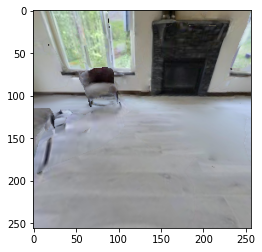

In [11]:
obs = env.reset()
obs_list = []
plt.imshow(obs['rgb'])
# Get closer to the object

# obs = env.step(2)
# obs_list.append(obs)
# metrics = env.get_metrics()
# print_info(obs, metrics)

# Grab the object
# obs = env.step(2)
obs_list.append(obs)
metrics = env.get_metrics()

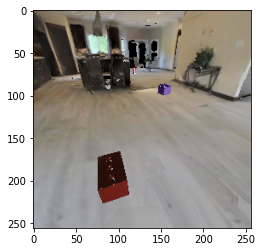

In [44]:
obs = env.step(0)
plt.imshow(obs['rgb'])

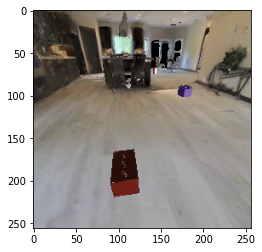

In [45]:
obs = env.step(1)
plt.imshow(obs['rgb'])

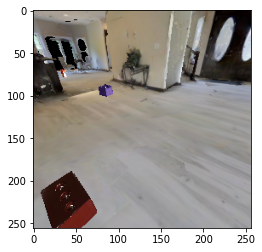

In [50]:
obs = env.step(2)
plt.imshow(obs['rgb'])

-1


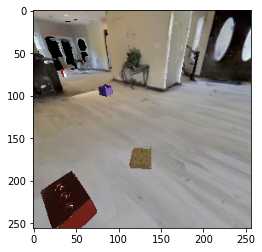

In [51]:
obs = env.step(3)
plt.imshow(obs['rgb'])
print(obs['gripped_object_id'])

In [28]:
def raycast(sim, sensor_name, crosshair_pos=[128, 128], max_distance=2.0):
    r"""Cast a ray in the direction of crosshair and check if it collides
    with another object within a certain distance threshold
    :param sim: Simulator object
    :param sensor_name: name of the visual sensor to be used for raycasting
    :param crosshair_pos: 2D coordiante in the viewport towards which the
        ray will be cast
    :param max_distance: distance threshold beyond which objects won't
        be considered
    """
    visual_sensor = sim._sensors[sensor_name]
    scene_graph = sim.get_active_scene_graph()
    scene_graph.set_default_render_camera_parameters(
        visual_sensor._sensor_object
    )
    render_camera = scene_graph.get_default_render_camera()
    center_ray = render_camera.unproject(mn.Vector2i(crosshair_pos))

    raycast_results = sim.cast_ray(center_ray, max_distance=max_distance)
    
    print(raycast_results.has_hits())
    closest_object = -1
    closest_dist = 1000.0
    if raycast_results.has_hits():
        for hit in raycast_results.hits:
            if hit.ray_distance < closest_dist:
                closest_dist = hit.ray_distance
                closest_object = hit.object_id
            print(hit.ray_distance, hit.object_id)
    return closest_object

In [32]:
raycast(env._sim, 'depth', [128, 192])

True
1.1231738328933716 -1
1.540419340133667 -1


-1

In [52]:
import habitat_sim

In [ ]:
habitat_sim.